# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Yusuf Leo Rizaldy
- **Email:** yusufl.rizaldy@gmail.com
- **ID Dicoding:** yusuflr

# Menentukan pertanyaan bisnis


- Bagaimana hubungan dari kelembaban dengan jumlah penyewaan sepeda?
- Bagaimana tren jumlah penyewaan sepeda oleh pengguna terdaftar selama musim panas dibandingkan dengan musim lainnya?
- Bagaimana pola penggunaan sepeda berdasarkan waktu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("d:\Coding\DBS Dicoding\Proyek Analisis Data\data\day.csv")
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\yusuf\AppData\Local\Temp\ipykernel_18616\3552747149.py:1: SyntaxWarning: invalid escape sequence '\C'
  day_df = pd.read_csv("d:\Coding\DBS Dicoding\Proyek Analisis Data\data\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("d:\Coding\DBS Dicoding\Proyek Analisis Data\data\hour.csv")
hour_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\yusuf\AppData\Local\Temp\ipykernel_18616\374493841.py:1: SyntaxWarning: invalid escape sequence '\C'
  hour_df = pd.read_csv("d:\Coding\DBS Dicoding\Proyek Analisis Data\data\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Insight pertama yaitu kita bisa mengetahui dataset hour memiliki 17 fitur sedangkan dataset day memiliki 16 fitur
- Penjelasan fitur terdapat pada file readme.txt

### Assessing Data

Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data day_df dan hour_df tidak memilikki data yang terduplikat dan data yang memiliki nilai Null
- Terdapat kesalahan tipe data pada fitur dteday pada tabel day_df dan hour_df yaitu dia bertuliskan "Object" yang seharusnya adalah "date"

### Cleaning Data

Pembersihan data dimulai dengan pengubahan tipe data pada fitur "dteday" menjadi tipe data "date"

In [12]:
day_df["dteday"] = day_df["dteday"].apply(pd.to_datetime)


In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df["dteday"] = hour_df["dteday"].apply(pd.to_datetime)

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data pada fitur dteday pada tabel day_df dan hour_df sudah berganti menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Data

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dapat dilihat pada day_df bahwa rata-rata kelembaban (hum) adalah 0.627 dengan standar deviasinya yaitu 0.142 sehingga datanya cukup bervariasi. Untuk jumlah peminjamnya sendiri memiliki rata-rata yaitu 4504 per harinya. 

Terbaca juga bahwa season 3 atau summer menjadi data yang sering muncul karena di 50% dan 75% otomatis data peminjam kemungkinan lebih tinggi disana.

In [17]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Pengguna sepeda terbaca bahwa terbanyak dalam satu jam adalah 977 orang diikuti juga untuk yang terendah adalah 1 orang dalam satu jam tersebut. Memiliki kisaran yang cukup beragam karena standar deviasinya memiliki nilai 181.387599 dimana terlihat sangat bervariasi datanya.

In [18]:
day_df.groupby(by="hum").agg({
    "cnt": ["max", "min", "mean", "std"],
    "dteday": "nunique"
})

cnt                    dteday
           max   min    mean std nunique
hum                                     
0.000000   623   623   623.0 NaN       1
0.187917  1635  1635  1635.0 NaN       1
0.254167  6857  6857  6857.0 NaN       1
0.275833  5169  5169  5169.0 NaN       1
0.290000  5102  5102  5102.0 NaN       1
...        ...   ...     ...  ..     ...
0.948261   605   605   605.0 NaN       1
0.949583  2594  2594  2594.0 NaN       1
0.962500  1607  1607  1607.0 NaN       1
0.970417   705   705   705.0 NaN       1
0.972500  2395  2395  2395.0 NaN       1

[595 rows x 5 columns]

Terlihat datanya masih belum bisa langsung dipahami tapi terlihat dari pengamatan awal bahwa nilai kelembapan ketika mencapai nilai semakin tinggi semakin kecil angkanya

In [19]:
day_df["hum_category"] = day_df["hum"].apply(lambda x: "Rendah" if x <= 0.4 else ("Sedang" if x <= 0.7 else "Tinggi"))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hum_category
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Tinggi
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sedang
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Sedang
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Sedang
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Sedang


Pengelompokkan kelembabapan menjadi rendah, sedang, dan tinggi

In [20]:
day_humidity_grouped = day_df.groupby("hum_category").agg({
    "cnt": ["max", "min", "mean", "std"],
    "dteday": "nunique"
})
print("Hubungan Kelembaban dengan Jumlah Penyewaan Sepeda:")
print(day_humidity_grouped)


Hubungan Kelembaban dengan Jumlah Penyewaan Sepeda:
               cnt                                 dteday
               max  min         mean          std nunique
hum_category                                             
Rendah        7442  623  4232.733333  2146.163778      30
Sedang        8714  431  4751.151064  1953.467439     470
Tinggi        7852   22  4037.471861  1787.695640     231


Terlihat di jumlah pengguna sepeda ketika berada pada category sedang memiliki jumlah paling banyak diantara kategori lainnya

In [21]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

dteday registered                               
       nunique        max  min         mean          std
season                                                  
1          181       5315  416  2269.204420  1200.269751
2          184       6456  674  3886.233696  1353.375628
3          188       6917  889  4441.691489  1304.626949
4          178       6946   20  3999.050562  1444.782557

Seperti insight diawal musim gugur atau 3 terhitung memiliki nilai mean paling tinggi diantara musim-musim lainnya sehingga terlihat bahwa data di musim panas paling banyak. 

In [22]:
hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

Terlihat pola dengan melihat mean tiap jamnya pada jam 0-5 memiliki rata-rata pengguna yang kecil dibawa 100 peminjam
lalu pada jam 6-8 menjadi jam padat karena mencapai angka 300an peminjamnya lalu jam 9-15 menunjukkan stabil angkanya dengan range 200-250 peminjam tiap jamnya
lalu jam 16-19 menjadi padat lagi lalu mulai menurun dari jam 20-23

jam padatnya terdapat pada jam 8, jam 17 dan jam 18 

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana hubungan dari kelembaban dengan jumlah penyewaan sepeda?

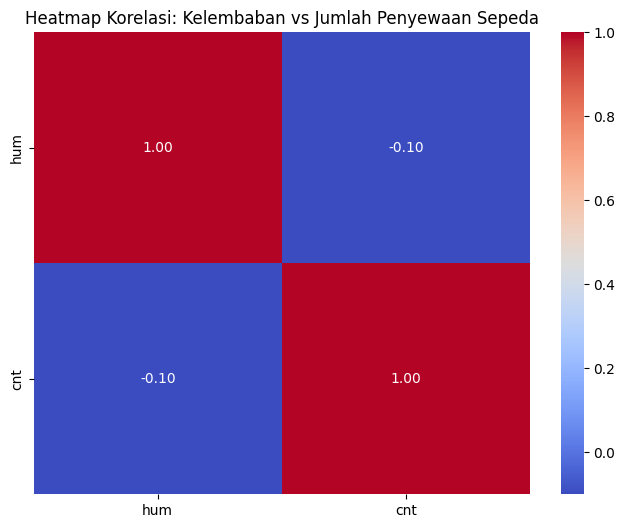

: 

In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = day_df[["hum", "cnt"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi: Kelembaban vs Jumlah Penyewaan Sepeda")
plt.show()

Hasil korelasinya berada pada angka -0.10 menunjukkan hubungan negatif sangat lemah

In [ ]:
sns.scatterplot(data=day_df, x="hum", y="cnt", hue="hum_category", style="hum_category")
plt.show()

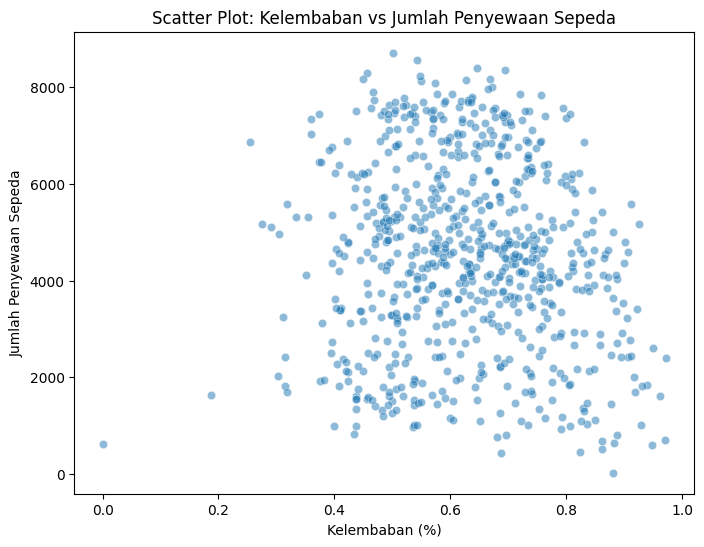

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=day_df["hum"], y=day_df["cnt"], alpha=0.5)
plt.xlabel("Kelembaban (%)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Scatter Plot: Kelembaban vs Jumlah Penyewaan Sepeda")
plt.show()

Pola yang terlihat sangat tidak jelas untuk hubungan kelembaban dengan jumlah penyewaan sepeda

### Pertanyaan 2:

- Bagaimana tren jumlah penyewaan sepeda oleh pengguna terdaftar selama musim panas dibandingkan dengan musim lainnya?

C:\Users\yusuf\AppData\Local\Temp\ipykernel_4172\3192606026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette="coolwarm")


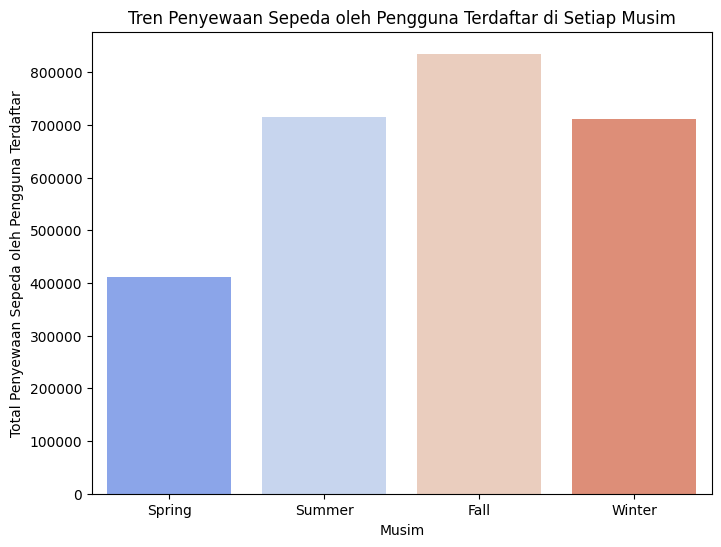

season
Spring    410726
Summer    715067
Fall      835038
Winter    711831
Name: registered, dtype: int64


In [ ]:
seasonal_counts = day_df.groupby("season")["registered"].sum()
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
seasonal_counts.index = seasonal_counts.index.map(season_labels)

plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda oleh Pengguna Terdaftar")
plt.title("Tren Penyewaan Sepeda oleh Pengguna Terdaftar di Setiap Musim")
plt.xticks(ticks=[0, 1, 2, 3], labels=seasonal_counts.index)
plt.show()

print(seasonal_counts)


Melihat jumlah penyewaan sepeda dengan 4 musim yang ada

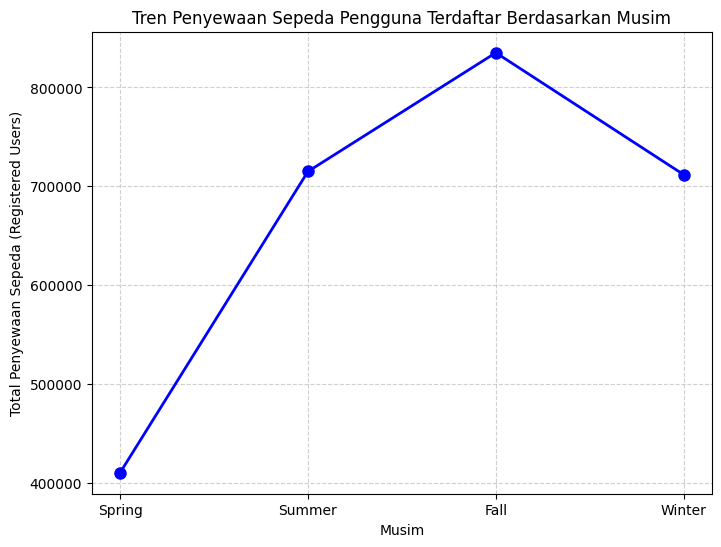

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(seasonal_counts.index, seasonal_counts.values, marker="o", linestyle="-", color="b", linewidth=2, markersize=8)
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda (Registered Users)")
plt.title("Tren Penyewaan Sepeda Pengguna Terdaftar Berdasarkan Musim")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Penggambaran dengan grafik garis sehingga bisa melihat trennya bagaimana. Terlihat bahwa tren jumlah penyewaan sepeda semakin menaik dari musim semi hingga puncaknya musim gugur lalu menurun di musim dingin


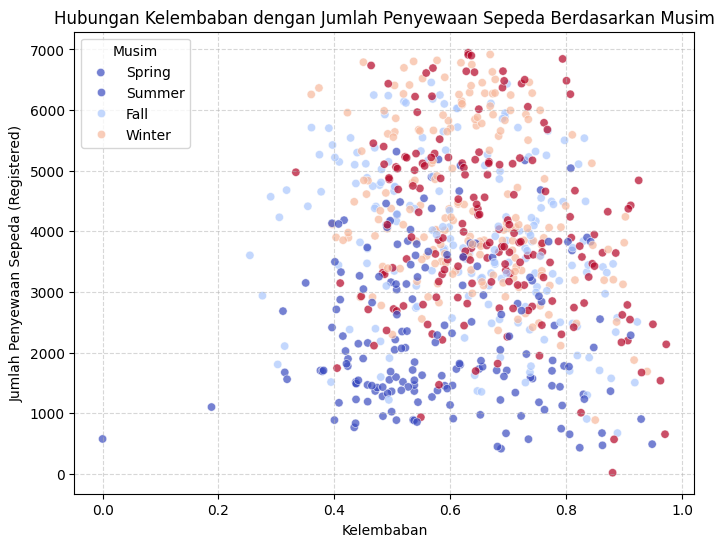

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=day_df, x="hum", y="registered", hue="season", palette="coolwarm", alpha=0.7)
plt.title("Hubungan Kelembaban dengan Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Penyewaan Sepeda (Registered)")
plt.legend(title="Musim", labels=seasonal_counts.index)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Tidak secara gamblang terlihat adanya kelinearan tetapi itu terlihat bahwa musim dengan suhu agak tinggi lebih banyak penyewaannya walau kelembaban tinggi

<Figure size 800x600 with 0 Axes>

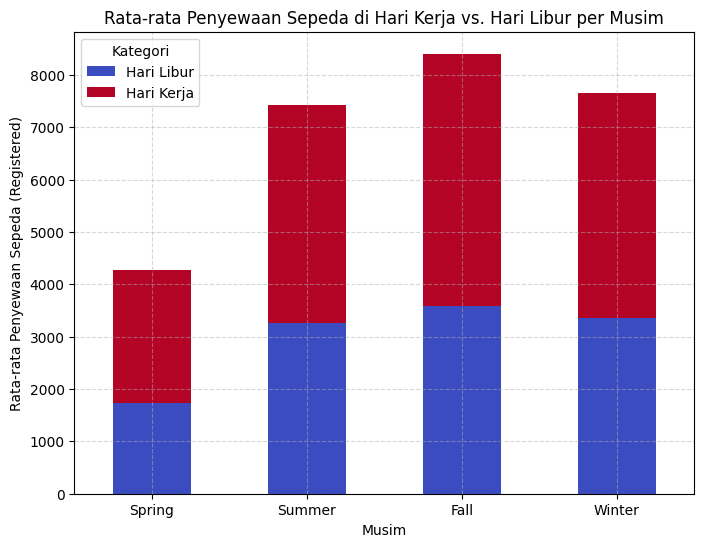

In [ ]:
workingday_counts = day_df.groupby(["season", "workingday"])["registered"].mean().unstack()

plt.figure(figsize=(8,6))
workingday_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8,6))
plt.title("Rata-rata Penyewaan Sepeda di Hari Kerja vs. Hari Libur per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda (Registered)")
plt.xticks(ticks=[0,1,2,3], labels=seasonal_counts.index, rotation=0)
plt.legend(["Hari Libur", "Hari Kerja"], title="Kategori")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Trennya pada musim panas cukup banyak di hari libur untuk jumlah penyewaan sepeda

### Pertanyaan 3:

- Bagaimana pola penggunaan sepeda berdasarkan waktu dalam sehari?

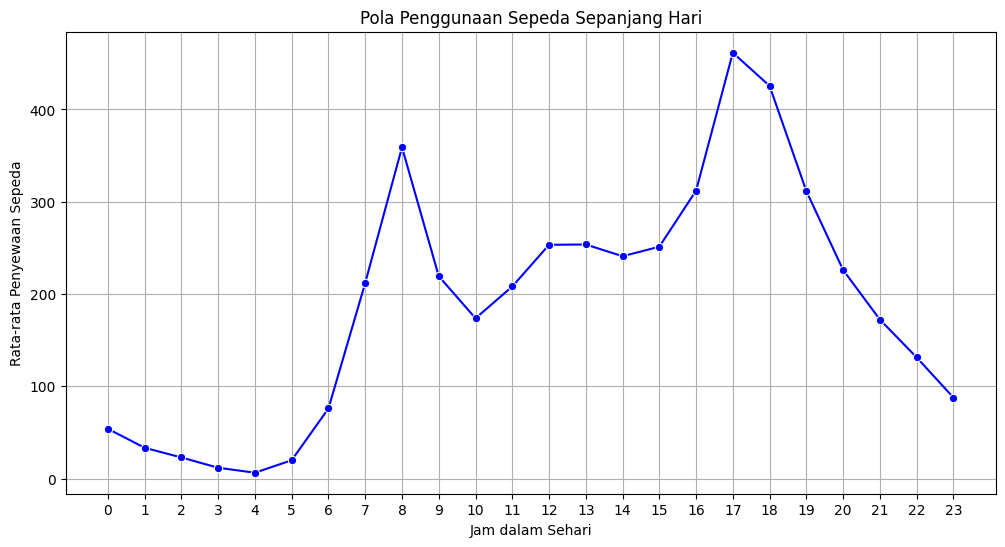

In [ ]:
hourly_usage = hour_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values, marker="o", linestyle="-", color="b")
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penggunaan Sepeda Sepanjang Hari")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

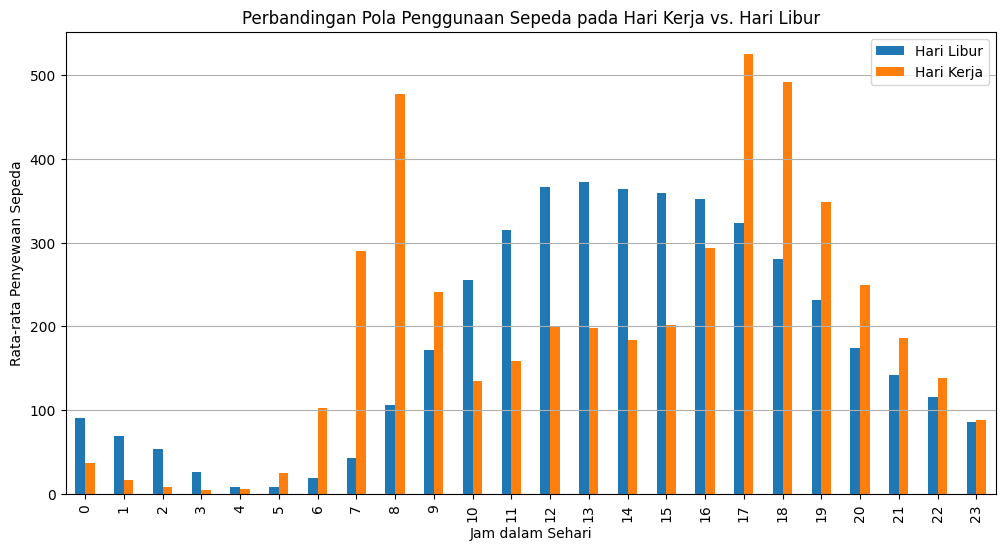

In [ ]:
hourly_usage_by_workingday = hour_df.groupby(["hr", "workingday"])["cnt"].mean().unstack()

plt.figure(figsize=(12, 6))
hourly_usage_by_workingday.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Perbandingan Pola Penggunaan Sepeda pada Hari Kerja vs. Hari Libur")
plt.legend(["Hari Libur", "Hari Kerja"])
plt.grid(axis="y")
plt.show()

Terlihat dari 2 graphic bahwa peak hour adalah jam 8 dan jam 17 dimana lebih tinggi ketika hari tersebut adalah hari kerja

### Analisis Lanjutan (Opsional)

Melakukan binning untuk data jam dibagi menjadi Dini hari, Pagi, Siang, Sore, Malam

Dilakukan agar mempermudah pengelompokkan dan mudah menyebutkan pembagian waktunya
Mempermudah memahami datanya secara langsung bahwa di kondisi hari tertentu memiliki jumlah penyewa sepeda sekian

In [ ]:
def categorize_time(hour):
    if 1 <= hour <= 5:
        return "Dini Hari"
    elif 5 < hour <= 10:
        return "Pagi"
    elif 11 <= hour <= 15:
        return "Siang"
    elif 15 < hour <= 18:
        return "Sore"
    elif 19 <= hour <= 24:
        return "Malam"
    else:
        return "Senja/Petang"

hour_df["time_category"] = hour_df["hr"].apply(categorize_time)


C:\Users\yusuf\AppData\Local\Temp\ipykernel_4172\666908847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="time_category", y="cnt", data=hour_df,


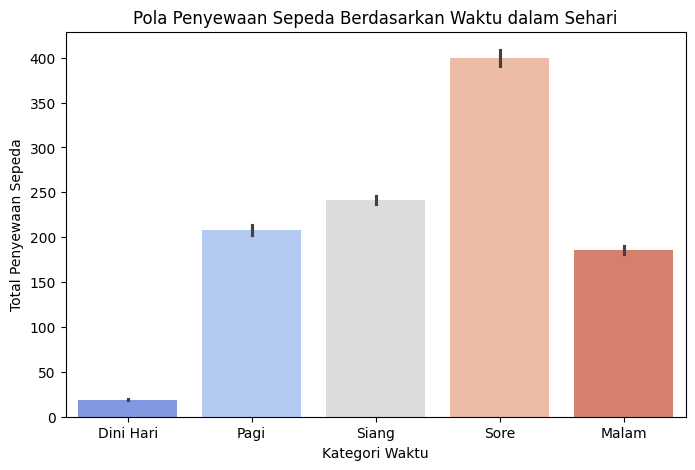

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="time_category", y="cnt", data=hour_df, 
            order=["Dini Hari", "Pagi", "Siang", "Sore", "Malam"], 
            palette="coolwarm")

plt.xlabel("Kategori Waktu")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari")
plt.show()


Membaginya menjadi pagi, siang, sore, malam, dan dini hari. Terlihat bahwa paling banyak penyewaan terjadi pada sore hari di range jam 16-18

### Conclusion

- Konklusi pertanyaan nomor 1  yaitu hubungan antara kelembaban dengan jumlah penyewaan sepeda menunjukkan korelasi yang sangat lemah dan cenderung tidak signifikan. Berdasarkan heatmap korelasi, nilai korelasi sebesar -0.10 menunjukkan hubungan negatif yang sangat kecil. Scatter plot juga memperlihatkan bahwa jumlah penyewaan sepeda tersebar di berbagai tingkat kelembaban tanpa pola yang jelas. Oleh karenanya, kelembaban tidak memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.

- Konkulsi pertanyaan nomor 2 yaitu tren jumlah penyewaan sepeda oleh pengguna terdaftar selama musim panas (Summer) lebih tinggi dibandingkan musim semi (Spring), tetapi lebih rendah dibandingkan musim gugur (Fall) dan hampir setara dengan musim dingin (Winter).

- Konklusi pertanyaan nomor 3 yaitu pola penggunaan sepeda berdasarkan waktu dalam sehari menunjukkan dua puncak utama, yaitu pada pukul **08:00** dan **17:00**. Peningkatan signifikan pada pagi hari bisa terjadi karena kebutuhan untuk berangkat sekolah/kerja dan di sore harinya adalah untuk pulang menuju tempat tinggal masing-masing. Di luar jam-jam tersebut, penggunaan sepeda cenderung lebih rendah, terutama pada tengah malam hingga dini hari.